In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-alcohol-consumption/student-mat.csv
/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-por.csv


### **Exploring the Alcohol Consumption of students and how different factors affect their Maths Grades.**
#### Below is a list of Attributes which will help us predict the final grade of students.
* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu - mother's education :** 
  * 0 - none,
  * 1 - primary education (4th grade)
  * 2 – 5th to 9th grade, 3 – secondary 
  * 4 – higher education)
* **Fedu - father's education** 
  * 0 - none, 
  * 1 - primary education (4th grade), 
  * 2 – 5th to 9th grade, 3 – secondary education 
  * 4 – higher education
* **Mjob - mother's job** 
  * 'teacher', 
  * 'health' care related, 
  *  civil 'services' (e.g. administrative or police),
  * 'at_home' or 'other')
* **Fjob - father's job** 
  * 'teacher', 
  * 'health' care related, 
  *  civil 'services' (e.g. administrative or police), 
  * 'at_home' or 'other')
* **reason - reason to choose this school** 
  * close to 'home', 
  * school 'reputation', 
  * 'course' preference or 'other'
* **guardian - student's guardian** 
  * 'mother', 'father' or 'other'
* **traveltime** - home to school travel time ( 1 - 1 hour)
* **studytime** - weekly study time ( 1 - 10 hours)
* **failures**- number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support ( yes or no)
* **famsup** - family educational support ( yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (yes or no)
* **nursery** - attended nursery school ( yes or no)
* **higher** - wants to take higher education ( yes or no)
* **internet** - Internet access at home ( yes or no)
* **romantic** - with a romantic relationship ( yes or no)
* **famrel** - quality of family relationships ( from 1 - very bad to 5 - excellent)
* **freetime** - free time after school ( from 1 - very low to 5 - very high)
* **goout** - going out with friends ( from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption ( from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption ( from 1 - very low to 5 - very high)
* **health** - current health status ( from 1 - very bad to 5 - very good)
* **absences** - number of school absences ( from 0 to 93)
#### These grades are related with the course subject, Math or Portuguese:

* **G1 - first period grade** (numeric: from 0 to 20)
* **G2 - second period grade** (numeric: from 0 to 20)
* **G3 - final grade** (numeric: from 0 to 20, output target)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.metrics import mean_squared_error,r2_score

### Reading the Data

In [3]:
df=pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
print("Total Missing Values :",sum(df.isnull().sum()))

Total Missing Values : 0


### Below plots explain that,
1. Most students belong to the Gabriel Peirera school.
2. Most students come under the age group of 15-18 with almost equal proportion of males and females,
3. Most students belong to family with size greater than or equal to 3.
4. Students coming from urban area is higher compared to rural area.
5. Cohabitation status of a student's parents is moslty together.

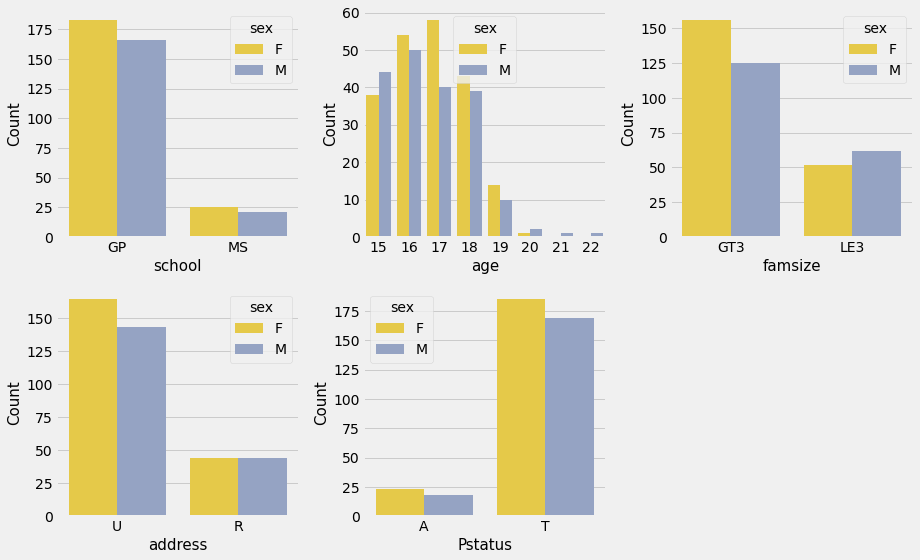

In [6]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['school','age','famsize','address','Pstatus']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(13,8)
    sns.countplot(x=col,data=df,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

#### **Let's explor a students's mother and father's job qualifications and how can these two factors affect student's grades**

 <p><font size=3>Below we observe plots for job qualifications of parents segregated on how much a student receives family support from  parents. Be it financially or personally. We can conclude that for the Mother's job qualifications the <b>other</b> category has a considerabe amount of No's indicating that the students  may not be receiving family support from mothers with job qualifications as 'other'.It maybe a low income job,such the parent is not able to provide her child the right amount of financial support for education or any other factor could be responsible for the student not getting adequate family educational support.</font></p>

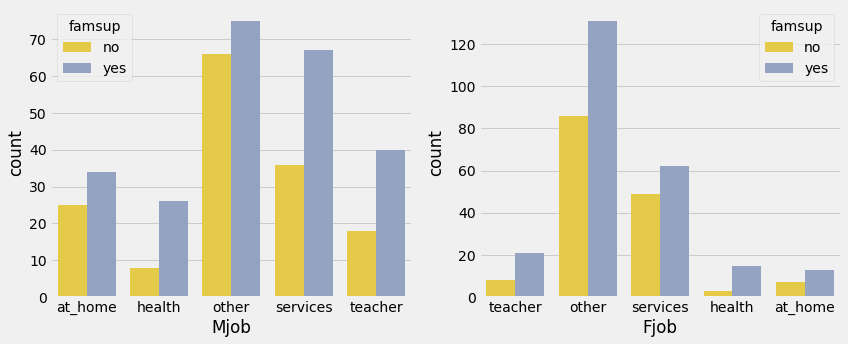

In [7]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sns.countplot(x=col,data=df,hue='famsup',palette='Set2_r')
    plt.tight_layout()

<font size=3>Below we observe that initially with students spending less time in travelling have a considerably higher studytime on an average over the week.Futher towards 3 hrs of travel time we see a drastic drop in study time of almost 10 hours on average each week where (1=10 hours). Surprisingly for 4 hrs of travelling time there is sudden increase in study time for the students. Reasons can be effective time management by students etc.</font>

Text(0.5, 1.0, 'Travel time vs Stduy time')

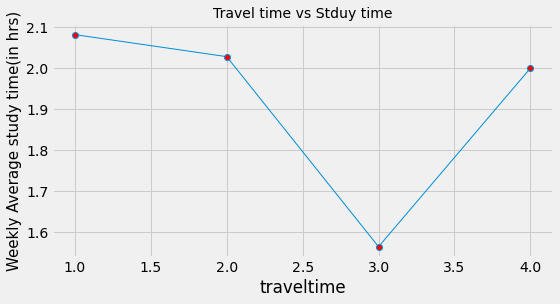

In [8]:
time=df.groupby('traveltime')['studytime'].mean().plot.line(figsize=(8,4),
                                                            marker='o',markerfacecolor='red',
                                                            linewidth=1)
plt.ylabel('Weekly Average study time(in hrs)',fontsize=15)
plt.title('Travel time vs Stduy time',fontsize=14)

<font size=3>Below is a line plot illustrating the distribution of study time of students vs their go out time. We notice that,initially,with low go out time the study time has seen a great inrement but as the go out time increases the study time has seen a  derement from 2.1 (almost 20 hrs) to almost 1.8 (10-15hrs).</font>

Text(0, 0.5, 'weekly average study time(in hrs)')

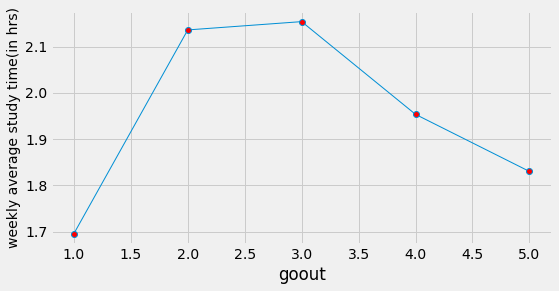

In [9]:
out=df.groupby('goout')['studytime'].mean().plot.line(figsize=(8,4),
                                                      marker='o',
                                                      markerfacecolor='red',
                                                      linewidth=1)
plt.ylabel('weekly average study time(in hrs)',fontsize=14)

<font size=4><b>Let's see if we can gain information thorugh internet accessibility for a particular student</b></font>

<font size=3>Below line plots show the distribution of students grades **G1** and **G2** over their weekly avg study time. Moreover how does internet usage affect the grades can also be concluded through the plots. For both grades we can observe that with no internet accessibility and low study hours the students grades are poor.But on the contrary although the student studies for less time the grades obtained is comparatively better for those who have internet accessibility.Lastly with increasing study time no internet students show a drastic improvemnet in marks while those with internet and good study hours are able to make slight imporvements in their grades for G2 and slight derement in grades for G1.Reasons: students with internet can waste time while those without it can concentrate properly on their studies. It depends on how effectively a student uses the internet for hie/her studies.</font>

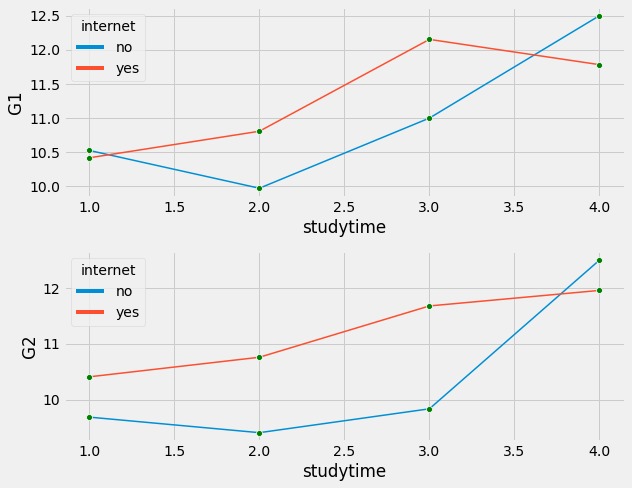

In [10]:
grades=['G1','G2']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=df.groupby(['internet','studytime'])[col].mean()
    x=x.reset_index('studytime')
    
    sns.lineplot(x='studytime',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()

#### Let's see which factors  lead to an increase in a student's daily and weekly alcohol consumption.

<font size=3>Below barplots illustrate the Daily and weekly alcohol consumption of students and its distribution over how frequently students go out with friends.For obvious reasons we see an increase in alcohol consumption as a result of spending more time outdoors with friends.This in turn could lead to overall degradation of health of the students.</font>

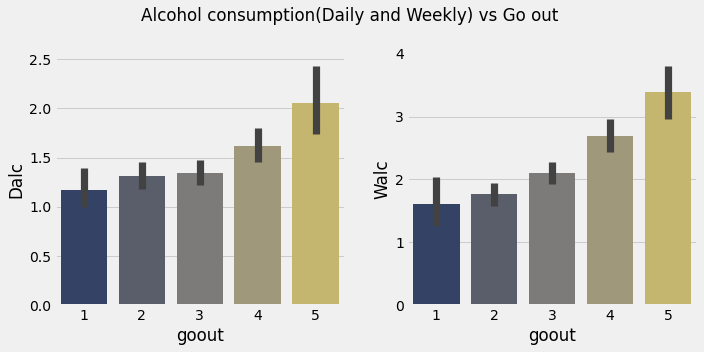

In [11]:
cols=['Dalc','Walc']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(10,5)
    
    sns.barplot(x='goout',y=col,data=df,palette='cividis')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption(Daily and Weekly) vs Go out ')

### Analysis of alcohol consumption and its effect on student's grade

<font size=3>Below line plots illustrate how daily alcohol consumptions affect tha grades of students. Prominently students with average to good health have avearge to better grades even with a considerable increase in their alcohol consumption. But one thing to notice is that students with extremely poor health initially have  achieved good grades, but with an increase in alcohol consumption their grades have drastically deteriorated taken into account their poor health and increased alcohol intake.</font>

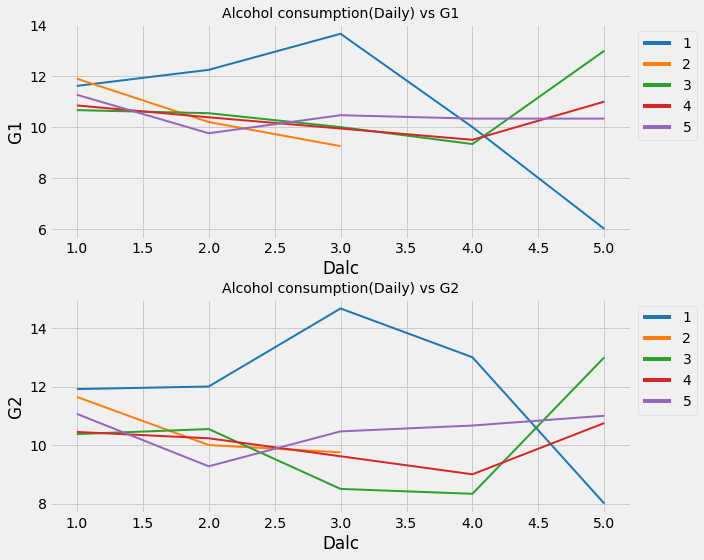

In [12]:
cols=['G1','G2']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(10,8)
    
    health=df.groupby(['Dalc','health'])[col].mean()
    health=health.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=health.index,
                 data=health,palette='tab10',linewidth=2)
    plt.tight_layout()
    plt.title(f'Alcohol consumption(Daily) vs {col}',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:>

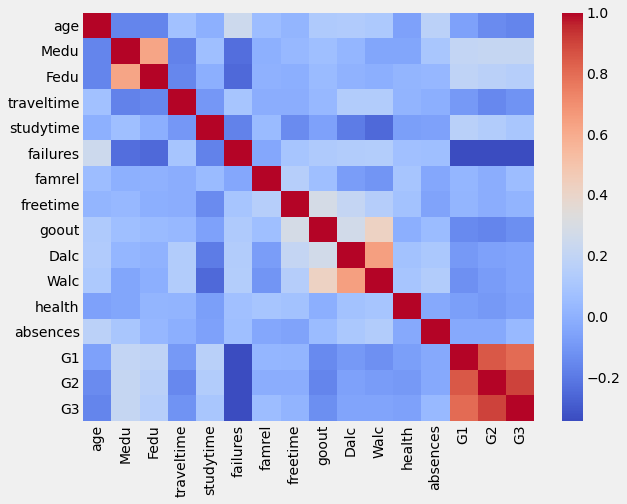

In [13]:
plt.figure(figsize=(9,7))
corr=df.corr()
sns.heatmap(corr,robust=True,cmap='coolwarm')

In [14]:
skew=pd.DataFrame(df.skew().sort_values(ascending=False))
skew.style.background_gradient(cmap='Blues')

,0
absences,3.671579
failures,2.387026
Dalc,2.190762
traveltime,1.607029
studytime,0.632142
Walc,0.611960
age,0.466270
G1,0.240613
goout,0.116502
Fedu,-0.031672


### Analyzing histograms for continuous features

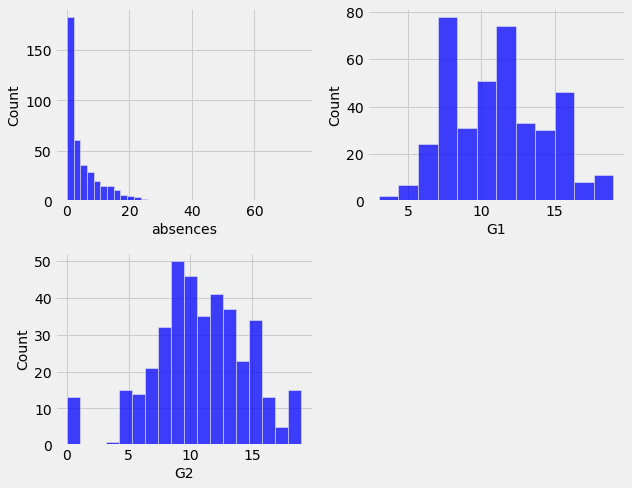

In [15]:
cols=['absences','G1','G2']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(9,7)
    
    sns.histplot(x=col,data=df,color='blue')
    
    plt.ylabel('Count',fontsize=14)
    plt.xlabel(col,fontsize=14)
    plt.tight_layout()

### Categorical columns

In [16]:
cat_cols=df.select_dtypes('object')
cat_cols

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [17]:
X=df.drop('G3',axis=1)
y=df.G3

### Splitting the data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
for col in cat_cols:
    le=LabelEncoder()
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
selector=SelectKBest(mutual_info_regression,k=30)
X_train=pd.DataFrame(selector.fit_transform(X_train,y_train))
X_test=pd.DataFrame(selector.transform(X_test))

In [21]:
def score(model):
    modell=model()
    print('Model:',model)
    print('-'*20)
    modell.fit(X_train,y_train)
    preds=modell.predict(X_test)
    
    print("RMSE :",np.sqrt(mean_squared_error(y_test,preds)))
    print('r2_score:',r2_score(y_test,preds))
    
    plt.figure(figsize=(7,6))
    plt.scatter(x=y_test,y=preds,color='red')
    plt.title('Actuals vs Predictions',fontsize=14)
    plt.xlabel('Actuals',fontsize=14)
    plt.ylabel('predictions',fontsize=14)

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
--------------------
RMSE : 2.1943395476589687
r2_score: 0.780952044409036


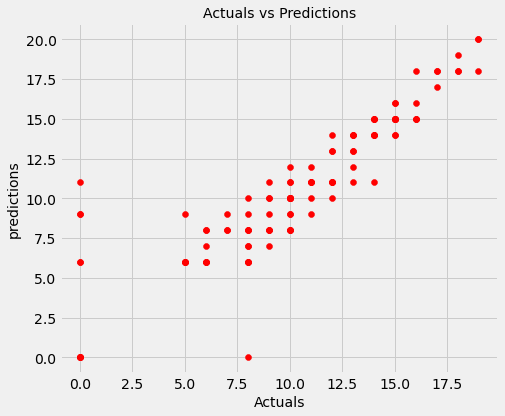

In [22]:
score(DecisionTreeRegressor)

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
--------------------
RMSE : 1.6949090850906101
r2_score: 0.8693154162704634


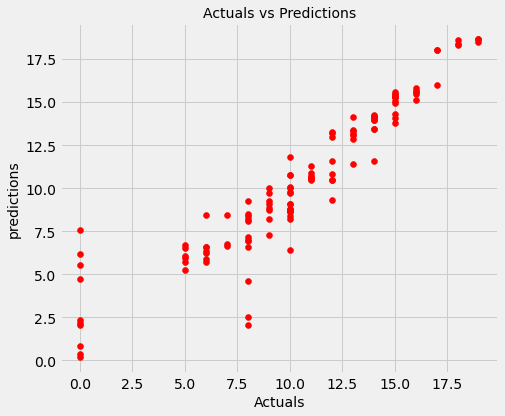

In [23]:
score(RandomForestRegressor)

Model: <class 'xgboost.sklearn.XGBRegressor'>
--------------------
RMSE : 1.8083517398189928
r2_score: 0.8512361668066575


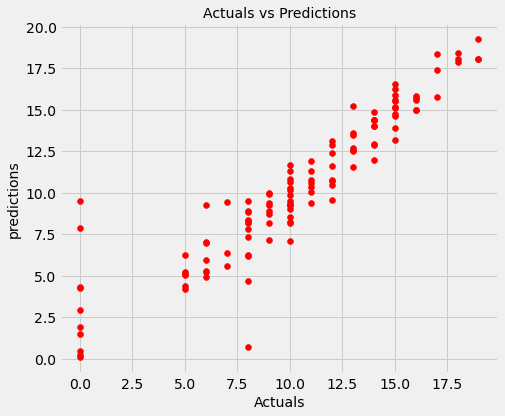

In [24]:
score(XGBRegressor)

Model: <class 'lightgbm.sklearn.LGBMRegressor'>
--------------------
RMSE : 1.7682434504607047
r2_score: 0.8577619925269327


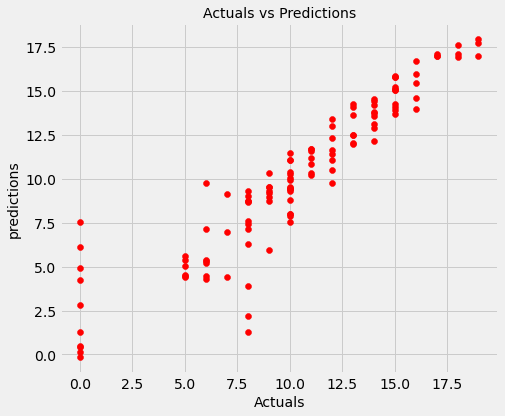

In [25]:
score(LGBMRegressor)

Model: <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
--------------------
RMSE : 1.8173228555237435
r2_score: 0.8497564901407049


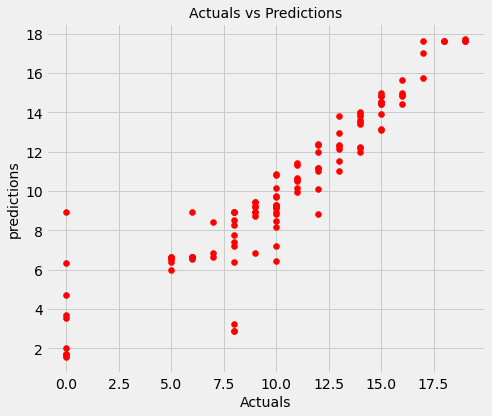

In [26]:
score(AdaBoostRegressor)

Model: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
--------------------
RMSE : 1.7150134790298068
r2_score: 0.8661967633377812


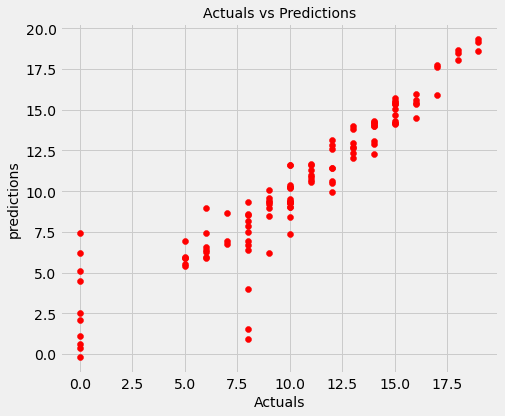

In [27]:
score(GradientBoostingRegressor)

#### From above we confirm that Random forest regressor has the least RMSE followed be GradientBoosting Regressor

<font size=4>Do upvote if found useful:)</font>